In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread , imshow
from skimage.transform import resize
from tensorflow.keras.models import load_model
import cv2

In [19]:
model_path = '/content/drive/MyDrive/dataset/others/model.h5'

model = load_model(model_path)
model.summary()

Model: "x-resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 256, 256, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                         

In [ ]:
base_dir = "/content/drive/MyDrive/dataset/data-science-bowl-2018"
train_dir = os.path.join(base_dir, "stage1_train.zip")
test_dir = os.path.join(base_dir, "stage1_test.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall("data/kaggle/stage1_train")

with zipfile.ZipFile(test_dir,"r") as z:
    z.extractall("data/kaggle/stage1_test")

In [ ]:
train_ids  = next(os.walk("data/kaggle/stage1_train"))[1]
test_ids = next(os.walk('data/kaggle/stage1_test'))[1]

In [ ]:
height , width = 256 , 256
x_train_ori = np.zeros((len(train_ids) , height , width , 3) , dtype = np.uint8 )
y_train_ori = np.zeros((len(train_ids) , height , width , 1) , dtype = bool)

In [ ]:
train_dir ="data/kaggle/stage1_train/"
test_dir = "data/kaggle/stage1_test/"

In [ ]:
for n , id_ in enumerate(train_ids )  :
    path = train_dir + id_
    img = imread(path +  '/images/' + id_ + '.png')[: , : , : 3]
    img = resize(img , (height , width ) , mode = 'constant' , preserve_range = True)
    x_train_ori[n] = img
    mask = np.zeros((height , width , 1 ) , dtype = bool)
    for mask_file in next(os.walk(path + '/masks/' ))[2] :
        mask_ =  imread(path + '/masks/' + mask_file )
        mask_ = resize(mask_ , (height , width ) ,mode = 'constant' , preserve_range = True)
        mask_ = np.expand_dims(mask_ , axis = -1 )
        mask = np.maximum(mask , mask_)
    y_train_ori[n] = mask

In [ ]:
x_test_ori = np.zeros((len(test_ids) , height , width , 3) , dtype = np.uint8)
sizes_x = []
for i , id_ in enumerate(test_ids) :
    path = test_dir + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:3]
    sizes_x.append([img.shape[0] , img.shape[1]])
    img = resize( img , (height , width ) , mode ='constant' , preserve_range = True)
    x_test_ori[i] =  img

In [ ]:
print(x_train_ori.shape)
print(y_train_ori.shape)

(670, 256, 256, 3)
(670, 256, 256, 1)


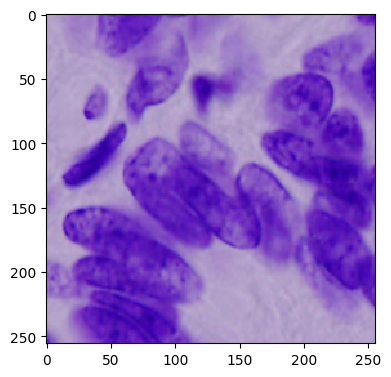

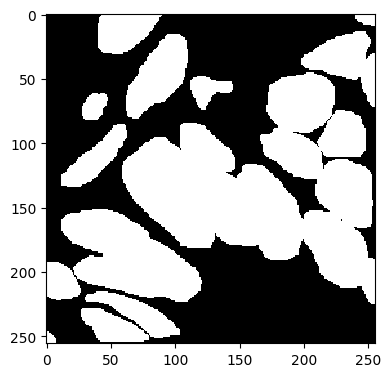

In [ ]:
import random

idx = random.randint(0, len(train_ids))
plt.figure(figsize = (4, 4))
imshow(x_train_ori[idx] )
plt.show()
plt.figure(figsize = (4, 4))
imshow(y_train_ori[idx] )
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

trainx_ori, testx_ori, trainy_ori, testy_ori = train_test_split(x_train_ori, y_train_ori, test_size=0.1, random_state=8)
print(trainx_ori.shape)
print(testx_ori.shape)
print(trainy_ori.shape)
print(testy_ori.shape)

(603, 256, 256, 3)
(67, 256, 256, 3)
(603, 256, 256, 1)
(67, 256, 256, 1)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dataset/others/best_model_ori.h5', save_best_only=True)
history_ori = model.fit(trainx_ori, trainy_ori, epochs=60, batch_size=32, validation_data=(testx_ori, testy_ori), verbose=1, callbacks=[model_checkpoint])

Epoch 1/60
19/19 [==============================] - ETA: 0s - loss: 0.4301 - accuracy: 0.8373

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 62s 2s/step - loss: 0.4301 - accuracy: 0.8373 - val_loss: 0.6952 - val_accuracy: 0.6306
Epoch 2/60
19/19 [==============================] - 11s 595ms/step - loss: 0.2332 - accuracy: 0.9470 - val_loss: 0.6923 - val_accuracy: 0.6143
Epoch 3/60
19/19 [==============================] - 11s 591ms/step - loss: 0.1683 - accuracy: 0.9609 - val_loss: 0.6894 - val_accuracy: 0.5178
Epoch 4/60
19/19 [==============================] - 11s 579ms/step - loss: 0.1412 - accuracy: 0.9647 - val_loss: 0.6735 - val_accuracy: 0.6998
Epoch 5/60
19/19 [==============================] - 11s 599ms/step - loss: 0.1237 - accuracy: 0.9678 - val_loss: 0.6170 - val_accuracy: 0.9085
Epoch 6/60
19/19 [==============================] - 11s 589ms/step - loss: 0.1114 - accuracy: 0.9702 - val_loss: 0.5629 - val_accuracy: 0.8862
Epoch 7/60
19/19 [==============================] - 11s 595ms/step - loss: 0.1011 - accuracy: 0.9724 - val_loss: 0.5059 - val_accuracy: 0.8730
Epoch 8/60
19

In [ ]:
model.save('/content/drive/MyDrive/dataset/others/after/model_ori.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
_, train_acc_ori = model.evaluate(trainx_ori, trainy_ori, verbose=0)
_, test_acc_ori = model.evaluate(testx_ori, testy_ori, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_ori, test_acc_ori))

Train: 0.994, Test: 0.978


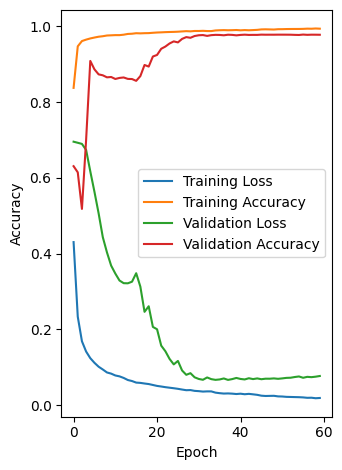

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_ori.history['loss'], label='Training Loss')
plt.plot(history_ori.history['accuracy'], label='Training Accuracy')
plt.plot(history_ori.history['val_loss'], label='Validation Loss')
plt.plot(history_ori.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### PlantDoc

In [5]:
base_dir = "/content/drive/MyDrive/dataset/plantDoc_leaf_disease"
train_dir = os.path.join(base_dir, "data.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall("data/plantDoc")

In [6]:
def count_files_in_folder(folder_path):
    files = os.listdir(folder_path)
    files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    num_files = len(files)
    return num_files

In [7]:
train_ids  = count_files_in_folder("data/plantDoc/data/train/images")
test_ids = count_files_in_folder("data/plantDoc/data/test/images")
print(train_ids)
print(test_ids)

470
119


In [8]:
height , width = 256 , 256

In [9]:
DATA_DIR = 'data/plantDoc'
def get_image_folder(train=True, augmented=False):
    if train:
        if augmented:
            return (os.path.join(DATA_DIR, 'aug_data', 'train', 'images'), os.path.join(DATA_DIR, 'aug_data', 'train', 'masks'))
        else:
            return (os.path.join(DATA_DIR, 'data', 'train', 'images'), os.path.join(DATA_DIR, 'data', 'train', 'masks'))
    else:
        if augmented:
            return (os.path.join(DATA_DIR, 'aug_data', 'test', 'images'), os.path.join(DATA_DIR, 'aug_data', 'test', 'masks'))
        else:
            return (os.path.join(DATA_DIR, 'data', 'test', 'images'), os.path.join(DATA_DIR, 'data', 'test', 'masks'))


def load_data(images_folder, masks_folder, size, target_size=(256, 256)):
    x = np.zeros((size , target_size[0] , target_size[1] , 3) , dtype=np.uint8)
    y = np.zeros((size , target_size[0] , target_size[1] , 1) , dtype=np.uint8)
    n = 0
    for image_name in os.listdir(images_folder):
        if image_name.endswith('.jpg'):
          image_path = os.path.join(images_folder, image_name)
          img = imread(image_path)[: , : , : 3]
          img = resize(img , target_size , mode = 'constant' , preserve_range = True)
          x[n] = img

          mask_filename = image_name.split('.')[0] + '.png'
          mask_ = os.path.join(masks_folder, mask_filename)

          if imread(mask_).ndim == 3:
            mask_ = imread(mask_)[: , : , 0]
          else:
            mask_ =  imread(mask_)

          mask_ = resize(mask_, target_size, mode='constant', preserve_range=True)
          mask_ = np.nan_to_num(mask_)
          mask_[mask_ > 0] = 1

          mask_ = np.expand_dims(mask_, axis=-1)

          y[n] = mask_
          n += 1
    print(f"{n} images chargées")
    return x, y

In [10]:
images_train_folder, masks_train_folder = get_image_folder(train=True, augmented=False)
print(images_train_folder)
print(masks_train_folder)

data/plantDoc/data/train/images
data/plantDoc/data/train/masks


In [11]:
train_images_plant, train_masks_plant = load_data(images_train_folder, masks_train_folder, train_ids)

470 images chargées


In [12]:
images_test_folder, masks_test_folder = get_image_folder(train=False, augmented=False)
print(images_test_folder)
print(masks_test_folder)

data/plantDoc/data/test/images
data/plantDoc/data/test/masks


In [13]:
test_images_plant, test_masks_plant = load_data(images_test_folder, masks_test_folder, test_ids)

118 images chargées


In [ ]:
model_path = '/content/drive/MyDrive/dataset/others/model.h5'

model_plant = load_model(model_path)

In [14]:
from sklearn.model_selection import train_test_split

trainx_plant, testx_plant, trainy_plant, testy_plant = train_test_split(train_images_plant, train_masks_plant, test_size=0.1, random_state=8)
print(trainx_plant.shape)
print(testx_plant.shape)
print(trainy_plant.shape)
print(testy_plant.shape)

(423, 256, 256, 3)
(47, 256, 256, 3)
(423, 256, 256, 1)
(47, 256, 256, 1)


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dataset/others/best_model_plant_new.h5', save_best_only=True)
history_plant = model_plant.fit(trainx_plant, trainy_plant, epochs=60, batch_size=32, validation_data=(testx_plant, testy_plant), verbose=1, callbacks=[model_checkpoint])

Epoch 1/60
14/14 [==============================] - ETA: 0s - loss: 0.5083 - accuracy: 0.7655

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 123s 4s/step - loss: 0.5083 - accuracy: 0.7655 - val_loss: 0.6947 - val_accuracy: 0.5728
Epoch 2/60
14/14 [==============================] - 21s 1s/step - loss: 0.3276 - accuracy: 0.9052 - val_loss: 0.7215 - val_accuracy: 0.1717
Epoch 3/60
14/14 [==============================] - 21s 1s/step - loss: 0.2400 - accuracy: 0.9340 - val_loss: 0.7371 - val_accuracy: 0.1572
Epoch 4/60
14/14 [==============================] - 21s 1s/step - loss: 0.2003 - accuracy: 0.9428 - val_loss: 0.7357 - val_accuracy: 0.1874
Epoch 5/60
14/14 [==============================] - 21s 1s/step - loss: 0.1777 - accuracy: 0.9471 - val_loss: 0.7227 - val_accuracy: 0.2753
Epoch 6/60
14/14 [==============================] - 21s 1s/step - loss: 0.1628 - accuracy: 0.9506 - val_loss: 0.7019 - val_accuracy: 0.4273
Epoch 7/60
14/14 [==============================] - 26s 2s/step - loss: 0.1419 - accuracy: 0.9577 - val_loss: 0.6542 - val_accuracy: 0.8029
Epoch 8/60
14/14 [============

In [16]:
model_plant.save('/content/drive/MyDrive/dataset/others/after/model_plant_new_af.h5')

In [17]:
_, train_acc = model_plant.evaluate(trainx_plant, trainy_plant, verbose=0)
_, val_acc = model_plant.evaluate(testx_plant, testy_plant, verbose=0)
_, test_acc = model_plant.evaluate(test_images_plant, test_masks_plant, verbose=0)
print('Train: %.3f, Val: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

Train: 0.991, Val: 0.944, Test: 0.929


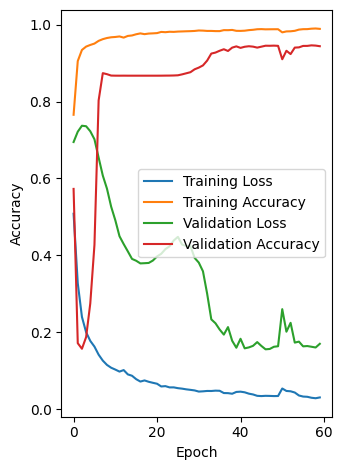

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history_plant.history['loss'], label='Training Loss')
plt.plot(history_plant.history['accuracy'], label='Training Accuracy')
plt.plot(history_plant.history['val_loss'], label='Validation Loss')
plt.plot(history_plant.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# plantDocAugm

In [20]:
train_dir = os.path.join(base_dir, "aug_data.zip")

import zipfile
with zipfile.ZipFile(train_dir,"r") as z:
    z.extractall("data/plantDoc")

In [21]:
train_ids  = count_files_in_folder("data/plantDoc/aug_data/train/images")
test_ids = count_files_in_folder("data/plantDoc/aug_data/test/images")
print(train_ids)
print(test_ids)

2352
589


In [22]:
images_train_folder, masks_train_folder = get_image_folder(train=True, augmented=True)
print(images_train_folder)
print(masks_train_folder)

data/plantDoc/aug_data/train/images
data/plantDoc/aug_data/train/masks


In [23]:
train_images_aug, train_masks_aug = load_data(images_train_folder, masks_train_folder, train_ids)

2352 images chargées


In [24]:
images_test_folder, masks_test_folder = get_image_folder(train=False, augmented=True)
print(images_test_folder)
print(masks_test_folder)

data/plantDoc/aug_data/test/images
data/plantDoc/aug_data/test/masks


In [25]:
test_images_aug, test_masks_aug = load_data(images_test_folder, masks_test_folder, test_ids)

588 images chargées


In [ ]:
model_path = '/content/drive/MyDrive/dataset/others/model.h5'

model_aug = load_model(model_path)

In [26]:
trainx_aug, testx_aug, trainy_aug, testy_aug = train_test_split(train_images_aug, train_masks_aug, test_size=0.1, random_state=8)
print(trainx_aug.shape)
print(testx_aug.shape)
print(trainy_aug.shape)
print(testy_aug.shape)

(2116, 256, 256, 3)
(236, 256, 256, 3)
(2116, 256, 256, 1)
(236, 256, 256, 1)


In [27]:
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/dataset/others/best_model_aug.h5', save_best_only=True)
history_aug = model_aug.fit(trainx_aug, trainy_aug, epochs=60, batch_size=32, validation_data=(testx_aug, testy_aug), verbose=1, callbacks=[model_checkpoint])

Epoch 1/60
67/67 [==============================] - ETA: 0s - loss: 0.3223 - accuracy: 0.8828

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 154s 2s/step - loss: 0.3223 - accuracy: 0.8828 - val_loss: 0.7102 - val_accuracy: 0.3532
Epoch 2/60
67/67 [==============================] - 108s 2s/step - loss: 0.1691 - accuracy: 0.9434 - val_loss: 0.5608 - val_accuracy: 0.8161
Epoch 3/60
67/67 [==============================] - 108s 2s/step - loss: 0.1292 - accuracy: 0.9549 - val_loss: 0.4587 - val_accuracy: 0.8142
Epoch 4/60
67/67 [==============================] - 108s 2s/step - loss: 0.1139 - accuracy: 0.9584 - val_loss: 0.4070 - val_accuracy: 0.8257
Epoch 5/60
67/67 [==============================] - 108s 2s/step - loss: 0.0999 - accuracy: 0.9629 - val_loss: 0.3431 - val_accuracy: 0.8669
Epoch 6/60
67/67 [==============================] - 108s 2s/step - loss: 0.0869 - accuracy: 0.9676 - val_loss: 0.2709 - val_accuracy: 0.9009
Epoch 7/60
67/67 [==============================] - 109s 2s/step - loss: 0.0796 - accuracy: 0.9700 - val_loss: 0.1377 - val_accuracy: 0.9496
Epoch 8/60
67/67 [======

In [28]:
model_aug.save('/content/drive/MyDrive/dataset/others/after/model_aug_af.h5')

In [ ]:
_, train_acc = model_aug.evaluate(trainx_aug, trainy_aug, verbose=0)
_, val_acc = model_aug.evaluate(testx_aug, testy_aug, verbose=0)
_, test_acc = model_aug.evaluate(test_images_aug, train_masks_aug, verbose=0)
print('Train: %.3f, Val: %.3f, Test: %.3f' % (train_acc, val_acc, test_acc))

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_plant.history['loss'], label='Training Loss')
plt.plot(history_plant.history['accuracy'], label='Training Accuracy')
plt.plot(history_plant.history['val_loss'], label='Validation Loss')
plt.plot(history_plant.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()